## 链表两两交换

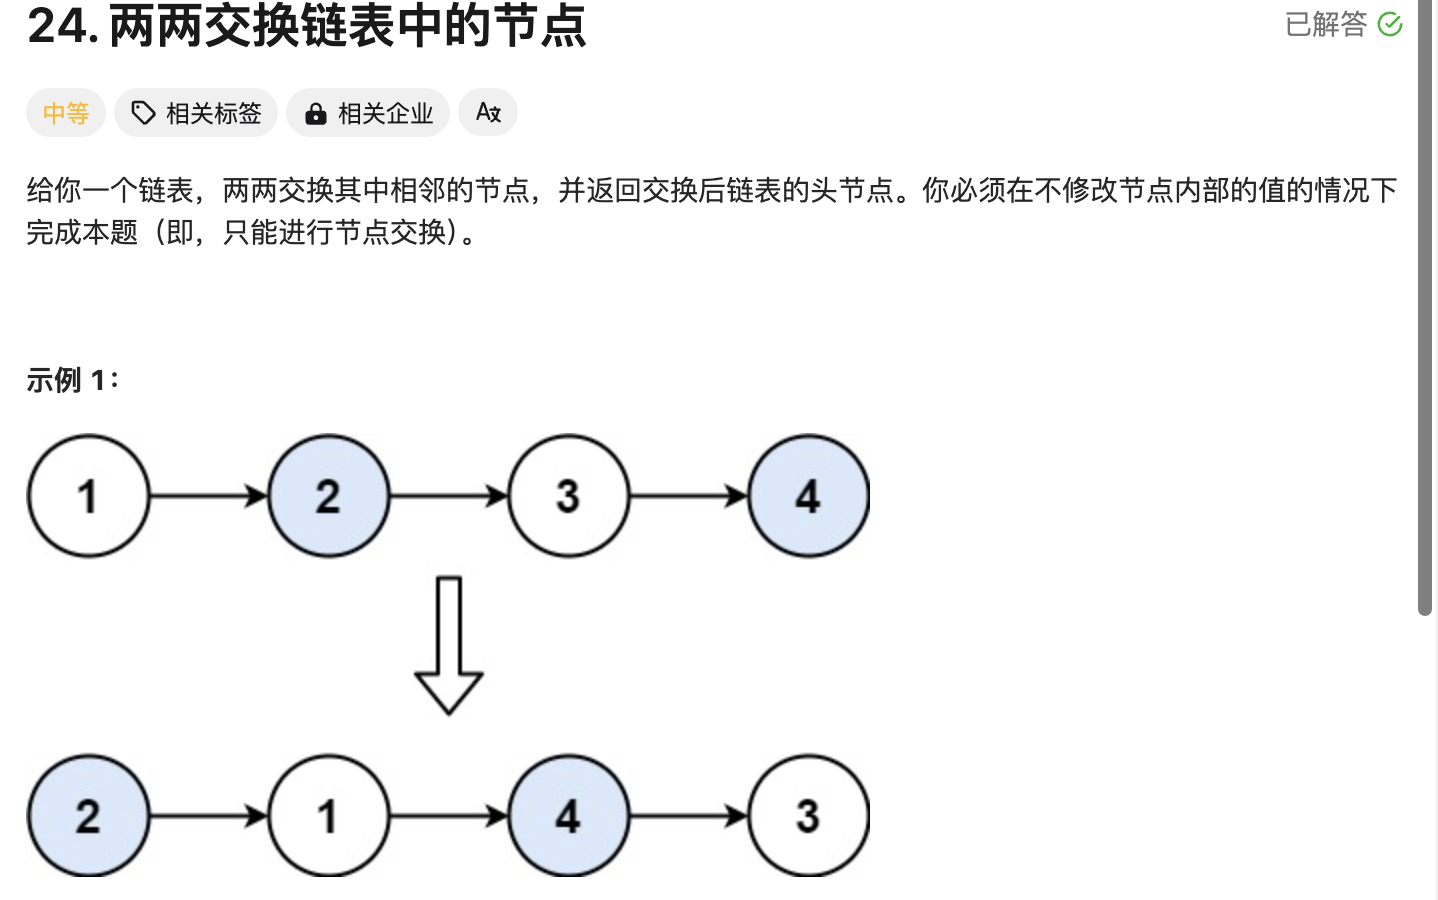

空间复杂度O（n）  时间复杂度O（1）

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next

class Solution:
    def swapPairs(self, head):
        dummy_head = ListNode(next=head) # 虚拟头节点
        cur = dummy_head
        while cur.next and cur.next.next:
            temp = cur.next               # 定义中间节点
            temp1 = cur.next.next.next    # 定义中间节点
            cur.next = cur.next.next
            cur.next.next = temp
            temp.next = temp1
            cur = cur.next.next
        return dummy_head.next




### 删除链表的倒数N个结点

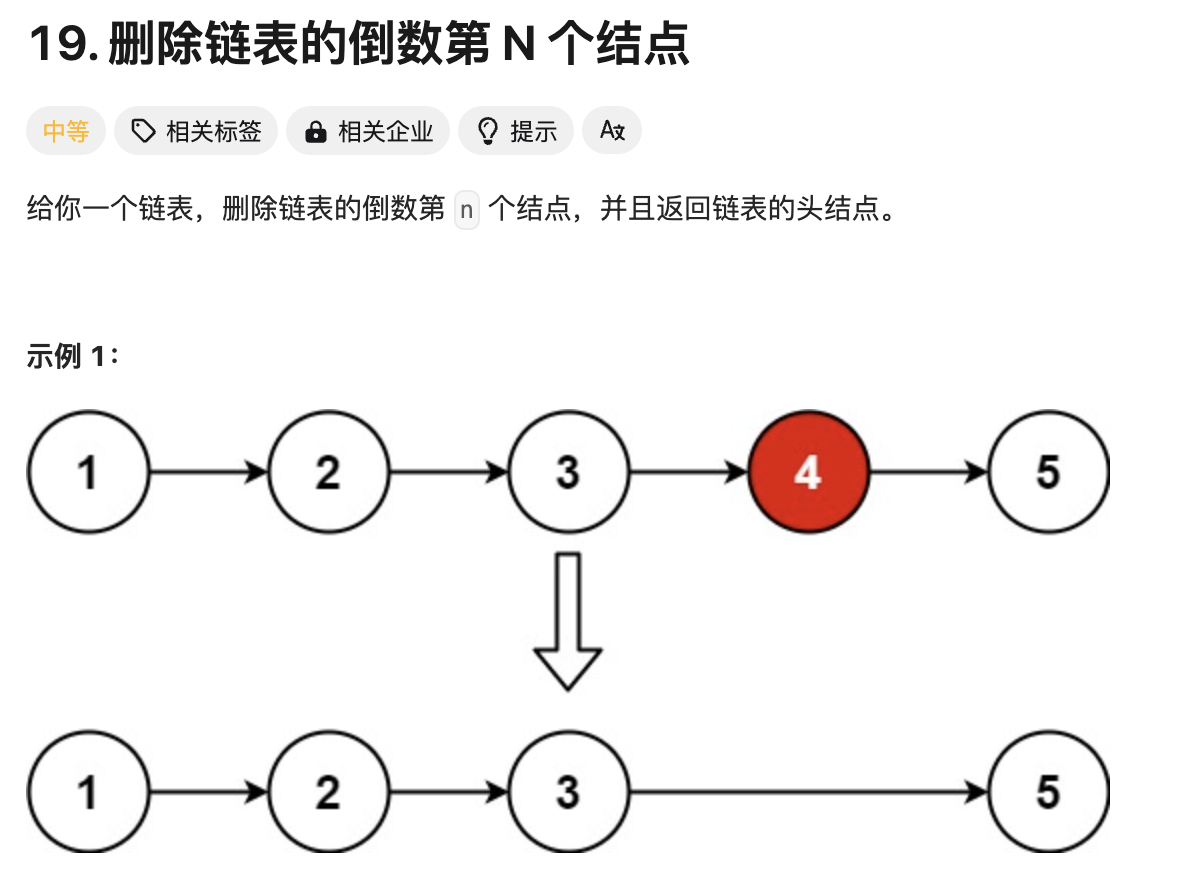

快慢结点  快先行n+1个

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution(object):
    def removeNthFromEnd(self, head, n):
        """
        :type head: ListNode
        :type n: int
        :rtype: ListNode
        """
        dummy_head = ListNode(next=head) # 虚拟头节点
        fast = slow = dummy_head  # 定义快慢指针
        for i in range(n+1):
            fast = fast.next
        while fast:  # 同时往前
            fast = fast.next
            slow = slow.next
        slow.next = slow.next.next  # 除去删除的节点

        return dummy_head.next


### 链表相交

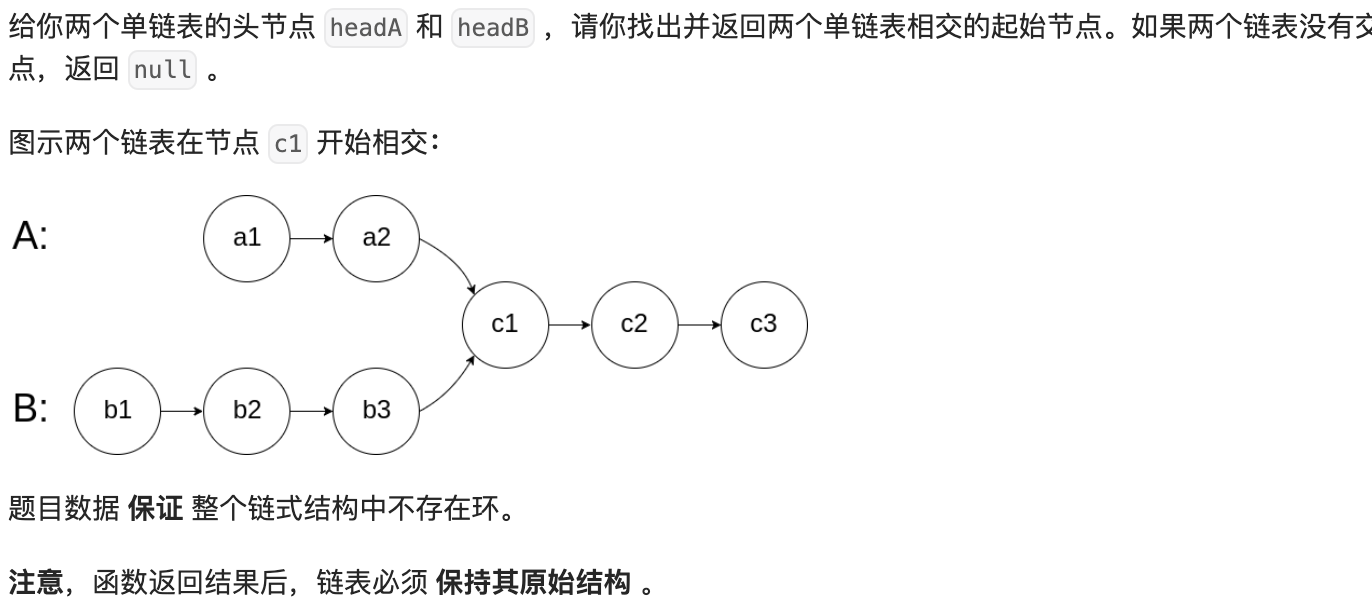

链表交换 主要是判断链表长短 然后长的先走到同样位置后同时遍历

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution(object):
    def getIntersectionNode(self, headA, headB):
        """
        :type head1, head1: ListNode
        :rtype: ListNode
        """
        cur = headA         #  计算链表长度
        lenA = 0
        while cur:
            cur = cur.next
            lenA += 1
        
        cur = headB
        lenB = 0
        while cur:
            cur = cur.next
            lenB += 1

        curA = headA
        curB = headB
        
        if lenA > lenB: # 确定链表的长短
            lenA, lenB = lenB, lenA
            curA, curB = curB, curA
        
        for _ in range(lenB - lenA):
            curB = curB.next
        
        while curA:
            if curA == curB:
                return curA
            else: 
                curA = curA.next
                curB = curB.next
        
        
        return None


### 环形链表II

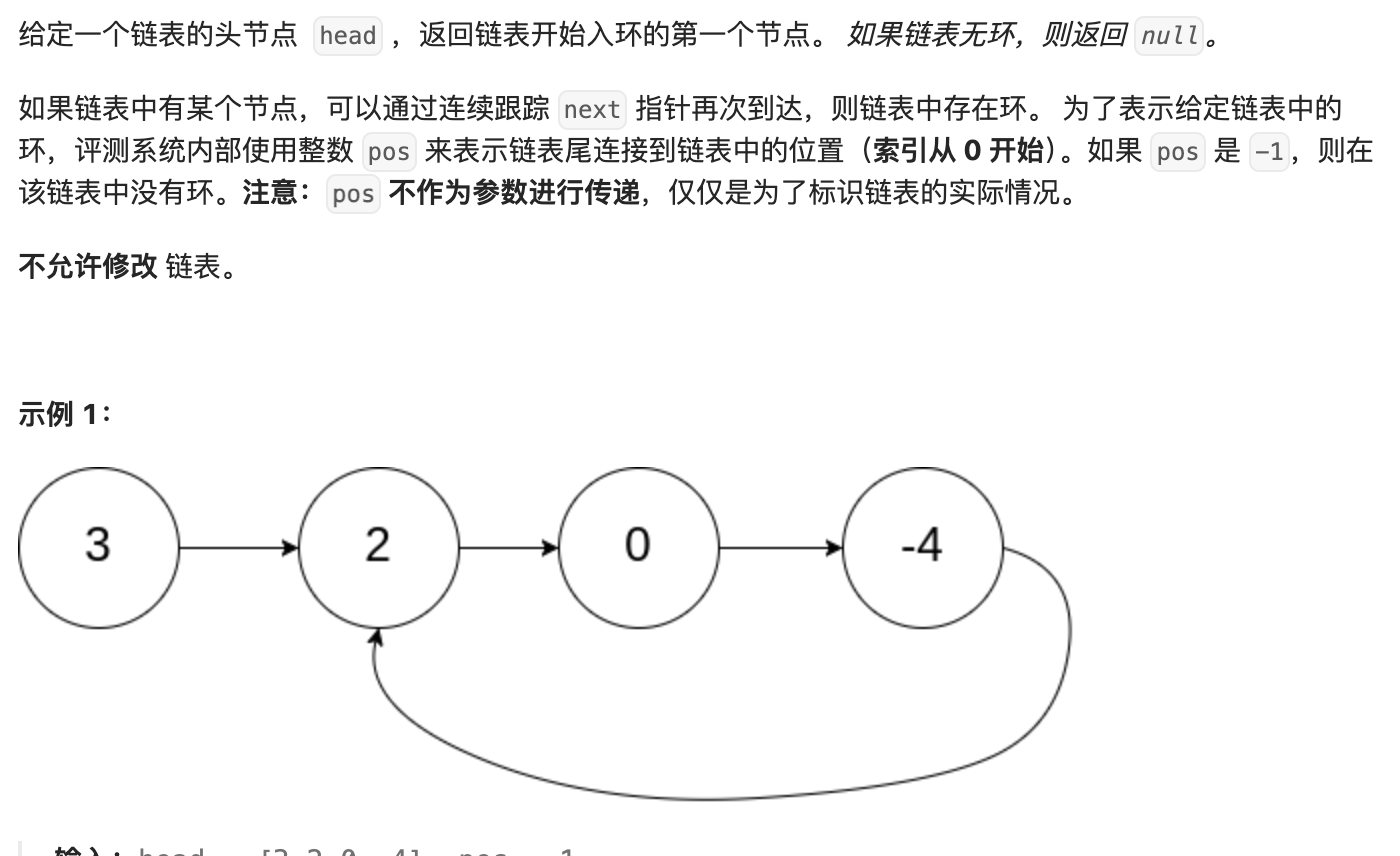

双指针 关键点在于判断相遇的结点  同时根据推导可以计算出slow和fast分别从head和相遇点走同样的部署，相遇点位置即为入环位置。

In [ ]:
# Definition for singly-linked list.
# class ListNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.next = None


#  假设fast的速度是slow的两倍 那么2（x+y）= x+y+n（y+z）  假设n=1 最后推到出x=z

class Solution(object):
    def detectCycle(self, head):
        """
        :type head: ListNode
        :rtype: ListNode
        """
        slow = head
        fast = head
        
        while fast and fast.next:

            fast = fast.next.next
            slow = slow.next
            if fast == slow:
                slow = head
                
                while slow != fast:
                    slow = slow.next
                    fast = fast.next
                    
                return slow
        return None